In [2]:
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats
from sklearn.datasets import load_iris
import pandas as pd

Questions I want to answer:
Does age correlate with type/frequency/ duration?
Which age group is at particular risk?
Which type is the most intense?

First of all we read in the data using pd.read(file location), I have assignened this database the name mig_df.

In [3]:
mig_df = pd.read_csv ('~/Documents/Flatiron/Project/archive/data.csv')

Now I am checking what I've just read in using the type function - it shows me that the file is a data frame

In [4]:
type(mig_df)

pandas.core.frame.DataFrame

Now i want to have a look at the dataframe by calling variable name mig_df

In [5]:
mig_df

,Age,Duration,Frequency,Location,Character,Intensity,Nausea,Vomit,Phonophobia,Photophobia,...,Vertigo,Tinnitus,Hypoacusis,Diplopia,Defect,Ataxia,Conscience,Paresthesia,DPF,Type
0,30,1,5,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,0,Typical aura with migraine
1,50,3,5,1,1,3,1,1,1,1,...,1,0,0,0,0,0,0,0,0,Typical aura with migraine
2,53,2,1,1,1,2,1,1,1,1,...,0,0,0,0,0,0,0,0,0,Typical aura with migraine
3,45,3,5,1,1,3,1,0,1,1,...,1,0,0,0,0,0,0,0,0,Typical aura with migraine
4,53,1,1,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,1,Typical aura with migraine
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,39,1,1,1,1,3,1,1,1,1,...,1,0,0,1,0,0,0,0,1,Basilar-type aura
396,20,3,2,1,1,3,1,0,1,1,...,0,1,1,0,0,0,0,0,1,Basilar-type aura
397,28,3,2,1,1,3,1,0,1,1,...,1,0,0,0,1,0,0,0,1,Basilar-type aura
398,20,3,1,1,1,3,1,0,1,1,...,1,0,0,0,0,0,0,1,1,Basilar-type aura


I can get more information about my data such as the column names, data types and number of entries by using the .info() function. This also tells me if there are any missing values. Luckily for me there are not. 

In [6]:
mig_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Age          400 non-null    int64 
 1   Duration     400 non-null    int64 
 2   Frequency    400 non-null    int64 
 3   Location     400 non-null    int64 
 4   Character    400 non-null    int64 
 5   Intensity    400 non-null    int64 
 6   Nausea       400 non-null    int64 
 7   Vomit        400 non-null    int64 
 8   Phonophobia  400 non-null    int64 
 9   Photophobia  400 non-null    int64 
 10  Visual       400 non-null    int64 
 11  Sensory      400 non-null    int64 
 12  Dysphasia    400 non-null    int64 
 13  Dysarthria   400 non-null    int64 
 14  Vertigo      400 non-null    int64 
 15  Tinnitus     400 non-null    int64 
 16  Hypoacusis   400 non-null    int64 
 17  Diplopia     400 non-null    int64 
 18  Defect       400 non-null    int64 
 19  Ataxia       400 non-null    

Although I could find the number of columns and rows with .info() I can also use .shape

In [7]:
mig_df.shape



(400, 24)

I can also look at the column names and save them as a list - this is so that I can index specific values such as item 5 

In [8]:
Mig_columns = mig_df.columns
print(Mig_columns)
print(Mig_columns[5])

Index(['Age', 'Duration', 'Frequency', 'Location', 'Character', 'Intensity',
       'Nausea', 'Vomit', 'Phonophobia', 'Photophobia', 'Visual', 'Sensory',
       'Dysphasia', 'Dysarthria', 'Vertigo', 'Tinnitus', 'Hypoacusis',
       'Diplopia', 'Defect', 'Ataxia', 'Conscience', 'Paresthesia', 'DPF',
       'Type'],
      dtype='object')
Intensity


Because my research questions focus mainly on age I want to find out more about age in this dataset. I can use.min, .max ,value_counts OR . describe

In [9]:
mig_df.Age.min(), mig_df.Age.max()

(15, 77)

In [10]:
age_values= mig_df.Age.value_counts
age_values


<bound method IndexOpsMixin.value_counts of 0      30
1      50
2      53
3      45
4      53
       ..
395    39
396    20
397    28
398    20
399    37
Name: Age, Length: 400, dtype: int64>

In [27]:
mig_df["Age"].describe()

count    400.000000
mean      31.705000
std       12.139043
min       15.000000
25%       22.000000
50%       28.000000
75%       40.000000
max       77.000000
Name: Age, dtype: float64

In [62]:
def Age_bins(row):
    Age=row["Age"]
    if Age<20: 
        Age_bins = 1
    elif Age>=20 and Age<30:
        Age_bins = 2
    elif Age>=30 and Age<40:
        Age_bins = 3
    elif Age>=40 and Age<50:
        Age_bins = 4
    elif Age>=50 and Age<60:
        Age_bins = 5
    elif Age>=60:
        Age_bins = 6

    return Age_bins


mig_df["Age_bins"] = mig_df.apply(Age_bins, axis=1)

My first question was does age correlate with Type, duration or frequency? 
1st I'm going to see what all the different types are using .value_counts()

In [ ]:
mig_df["Type"].value_counts()


Typical aura with migraine       247
Migraine without aura             60
Familial hemiplegic migraine      24
Typical aura without migraine     20
Basilar-type aura                 18
Other                             17
Sporadic hemiplegic migraine      14
Name: Type, dtype: int64

In the next box I'm grouping the data frame by type and converting all the values in each column to the mean for that type. 

In [28]:
Type_df = mig_df.groupby("Type",as_index=False).mean()
Type_df

,Type,Age,Duration,Frequency,Location,Character,Intensity,Nausea,Vomit,Phonophobia,...,Dysarthria,Vertigo,Tinnitus,Hypoacusis,Diplopia,Defect,Ataxia,Conscience,Paresthesia,DPF
0,Basilar-type aura,31.555556,1.944444,1.611111,1.000000,1.000000,2.888889,1.000000,0.277778,1.000000,...,0.000000,0.833333,0.388889,0.333333,0.111111,0.333333,0.0,0.222222,0.166667,0.666667
1,Familial hemiplegic migraine,21.458333,1.583333,1.666667,1.000000,1.000000,2.500000,1.000000,0.208333,1.000000,...,0.000000,0.416667,0.291667,0.000000,0.000000,0.000000,0.0,0.083333,0.000000,1.000000
2,Migraine without aura,33.166667,1.950000,4.200000,1.000000,1.000000,3.000000,1.000000,0.600000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.300000
3,Other,38.000000,1.764706,1.764706,1.529412,1.647059,3.000000,0.764706,0.470588,0.470588,...,0.000000,0.470588,0.176471,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.647059
4,Sporadic hemiplegic migraine,21.571429,1.500000,1.642857,1.000000,1.000000,2.142857,1.000000,0.428571,1.000000,...,0.071429,0.357143,0.285714,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
5,Typical aura with migraine,32.910931,1.493927,2.113360,1.000000,1.000000,2.489879,1.000000,0.246964,1.000000,...,0.000000,0.024291,0.000000,0.000000,0.000000,0.000000,0.0,0.004049,0.000000,0.348178
6,Typical aura without migraine,26.600000,1.700000,2.500000,0.000000,0.000000,0.000000,0.950000,0.400000,1.000000,...,0.000000,0.300000,0.150000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.650000


I'm now going to graph mean age vs type to see what the average age is for each type

Text(0.5, 0, 'MigraineType')

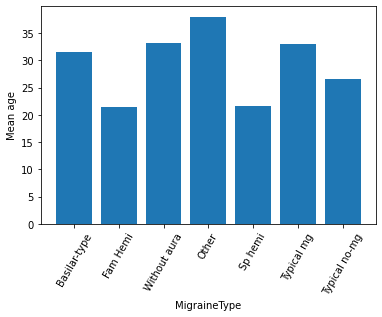

In [29]:
Type_df["Age"]

labels=["Basilar-type", "Fam Hemi", "Without aura", "Other", "Sp hemi", "Typical mg", "Typical no-mg"]

fig, ax = plt.subplots()

ax.bar(data=Type, x='Type', height='Age');
#ax.set_xticks(labels),
plt.xticks (ticks=[0,1,2,3,4,5,6], labels=labels, rotation=60);
ax. set_ylabel("Mean age")
ax. set_xlabel("MigraineType")



what about correlations?

In [63]:
correlate=mig_df.corr()
correlate

,Age,Duration,Frequency,Location,Character,Intensity,Nausea,Vomit,Phonophobia,Photophobia,...,Vertigo,Tinnitus,Hypoacusis,Diplopia,Defect,Ataxia,Conscience,Paresthesia,DPF,Age_bins
Age,1.000000,-0.045263,0.073431,0.133766,0.128077,0.114036,0.006542,-0.028650,-0.101022,-0.031461,...,-0.026967,-0.098046,-0.008872,0.033883,0.028449,NaN,-0.039212,-0.000275,0.088623,0.969584
Duration,-0.045263,1.000000,0.149240,-0.003515,0.005733,0.052115,-0.144654,-0.046468,-0.011165,-0.072356,...,0.122716,-0.022421,0.009082,0.035904,0.062503,NaN,-0.056207,0.081661,0.072351,-0.024326
Frequency,0.073431,0.149240,1.000000,-0.033373,-0.030762,0.070793,0.037977,0.133929,0.043154,0.031151,...,-0.064355,-0.061381,-0.063772,-0.057808,-0.076059,NaN,-0.097445,-0.053578,0.052049,0.080343
Location,0.133766,-0.003515,-0.033373,1.000000,0.933517,0.658737,-0.011551,0.030900,-0.267320,-0.214672,...,-0.045861,-0.013362,0.012670,0.007278,0.012670,NaN,0.013702,0.008925,-0.028276,0.119655
Character,0.128077,0.005733,-0.030762,0.933517,1.000000,0.648325,-0.009123,0.017396,-0.437568,-0.397716,...,-0.023838,-0.017451,0.010007,0.005748,0.010007,NaN,0.010822,0.007049,-0.023997,0.119740
Intensity,0.114036,0.052115,0.070793,0.658737,0.648325,1.000000,0.010261,-0.011358,-0.104765,-0.098647,...,-0.024622,-0.099848,0.031620,0.048950,0.085214,NaN,0.092158,0.060027,-0.073378,0.085891
Nausea,0.006542,-0.144654,0.037977,-0.011551,-0.009123,0.010261,1.000000,0.077624,0.134659,0.466108,...,-0.161592,-0.066325,0.013884,0.007976,0.013884,NaN,0.015015,0.009780,-0.134965,-0.026457
Vomit,-0.028650,-0.046468,0.133929,0.030900,0.017396,-0.011358,0.077624,1.000000,-0.003516,0.022157,...,-0.082881,-0.039186,-0.041140,0.026919,0.002860,NaN,0.030285,0.002015,0.022945,-0.019906
Phonophobia,-0.101022,-0.011165,0.043154,-0.267320,-0.437568,-0.104765,0.134659,-0.003516,1.000000,0.700786,...,-0.197516,0.038331,0.018722,0.010755,0.018722,NaN,0.020248,0.013189,-0.044900,-0.104022
Photophobia,-0.031461,-0.072356,0.031151,-0.214672,-0.397716,-0.098647,0.466108,0.022157,0.700786,1.000000,...,-0.161985,0.036092,0.017629,0.010127,0.017629,NaN,0.019066,0.012418,-0.062449,-0.048073


<AxesSubplot:>

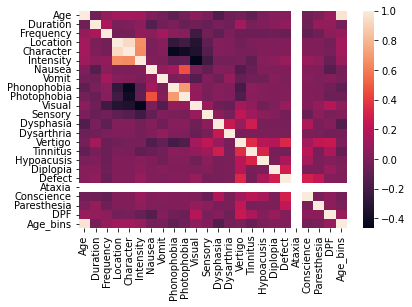

In [64]:
corr = mig_df.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)


Now I'm going to sort these out to see which have a high enough correlation to be significant (without being 1 so as to omit the self correlates)

In [65]:


cc = mig_df.corr()
cols = cc.columns
for index,row in cc.iterrows():
    for col in cols:
        if (1 > abs(row[col]) > .5):
            print(index,col,row[col])



Age Age_bins 0.9695839274003346
Location Character 0.9335172492036532
Location Intensity 0.6587373619964673
Character Location 0.9335172492036532
Character Intensity 0.6483250530395359
Intensity Location 0.6587373619964673
Intensity Character 0.6483250530395359
Phonophobia Photophobia 0.7007858361449262
Photophobia Phonophobia 0.7007858361449262
Age_bins Age 0.9695839274003346


Interestingly there's no relationship between migraines and age.

Now looking at this my new question is what is the worst type of migraine? Since intesity is quite a good overall metric for 'most bad' I'm going to graph out intensity vs type to see which type is the worst.

Text(0.5, 0, 'MigraineType')

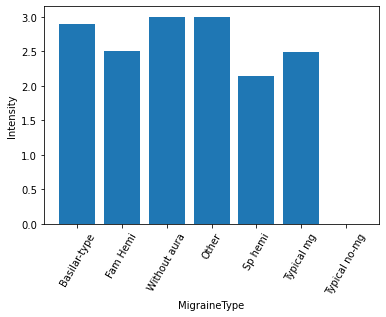

In [32]:
Type_df = mig_df.groupby("Type",as_index=False).mean()


labels=["Basilar-type", "Fam Hemi", "Without aura", "Other", "Sp hemi", "Typical mg", "Typical no-mg"]

fig, ax = plt.subplots()

ax.bar(data=Type_df, x='Type', height = 'Intensity');
#ax.set_xticks(labels),
plt.xticks (ticks=[0,1,2,3,4,5,6], labels=labels, rotation=60);
ax. set_ylabel("Intensity")
ax. set_xlabel("MigraineType")



I didnt get any info with the data about how they measured intensity so I'm going to see if the intensity and duration graphs are similar 

Text(0.5, 0, 'MigraineType')

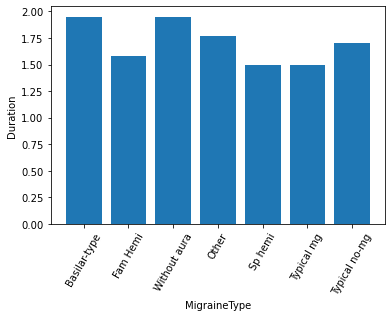

In [58]:
Type_df = mig_df.groupby("Type",as_index=False).mean()


labels=["Basilar-type", "Fam Hemi", "Without aura", "Other", "Sp hemi", "Typical mg", "Typical no-mg"]

fig, ax = plt.subplots()

ax.bar(data=Type_df, x='Type', height = 'Duration');
#ax.set_xticks(labels),
plt.xticks (ticks=[0,1,2,3,4,5,6], labels=labels, rotation=60);
ax. set_ylabel("Duration")
ax. set_xlabel("MigraineType")

We have 2 clear winners in the worst kind of migrane competion. The average age for both these is between 30 and 35 which answers one of by initial questions (who is most at risk?) SO from this I have learned that the worst type of migraines are the Basilar type and migraine without aura. Aura or vision distortion doesn't equate to intensity and the average age of sufferers is 30-35.